<a href="https://colab.research.google.com/github/Kimambo/Dissertate/blob/master/Copy_of_RufijiARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Step 1***

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Rufiji.csv to Rufiji.csv


In [ ]:
# Replace 'rufiji.csv' with the correct file name after upload
df = pd.read_csv('Rufiji.csv')

In [ ]:
# Reshape the dataset - Melt the months into rows and create a datetime column
df.columns = df.columns.str.strip()
df_melted = pd.melt(df, id_vars='Year', var_name='Month', value_name='Flow')
df_melted['Date'] = pd.to_datetime(df_melted['Year'].astype(str) + '-' + df_melted['Month'], format='%Y-%B')

In [ ]:
# Sort the data by 'Date' and set 'Date' as the index
df_melted = df_melted.sort_values(by='Date')
df_melted.set_index('Date', inplace=True)
df_melted.drop(columns=['Year', 'Month'], inplace=True)

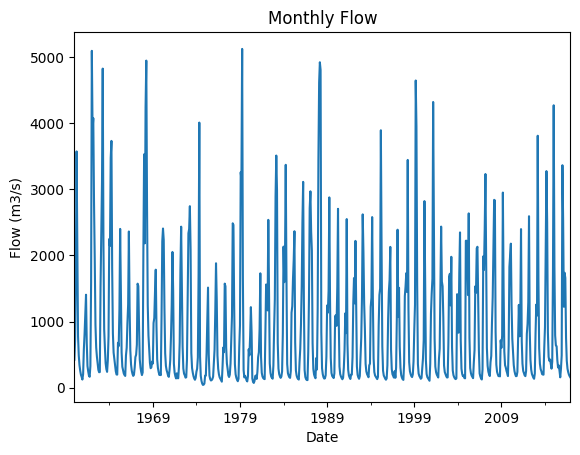

In [ ]:
# Plot the time series data
df_melted['Flow'].plot()
plt.title('Monthly Flow')
plt.xlabel('Date')
plt.ylabel('Flow (m3/s)')
plt.show()

***Step 2***

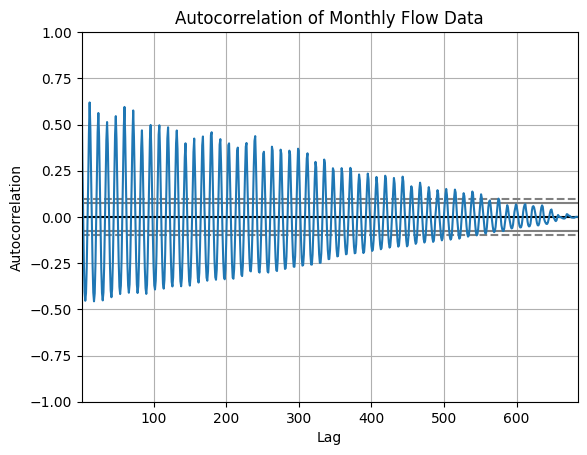

In [ ]:
# Step 2: Autocorrelation Plot
from pandas.plotting import autocorrelation_plot

# Autocorrelation plot for the time series data
autocorrelation_plot(df_melted['Flow'])
plt.title('Autocorrelation of Monthly Flow Data')
plt.show()

***Step 3***

In [ ]:
# Step 3: Fit an ARIMA model and plot residuals
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame

In [ ]:
# Fit the ARIMA model (adjust order (p, d, q) as necessary)
model = ARIMA(df_melted['Flow'], order=(5, 1, 0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Flow   No. Observations:                  684
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5502.394
Date:                Sat, 21 Sep 2024   AIC                          11016.788
Time:                        09:57:41   BIC                          11043.947
Sample:                    01-01-1960   HQIC                         11027.298
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0466      0.027      1.758      0.079      -0.005       0.099
ar.L2         -0.1390      0.038     -3.696      0.000      -0.213      -0.065
ar.L3         -0.0636      0.043     -1.488      0.1

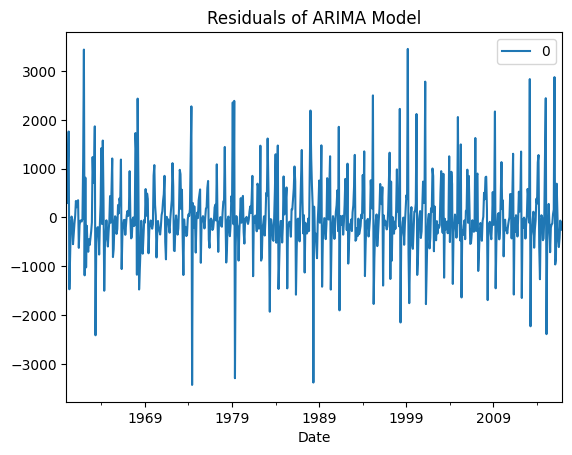

In [ ]:
# Plot the residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.title('Residuals of ARIMA Model')
plt.show()

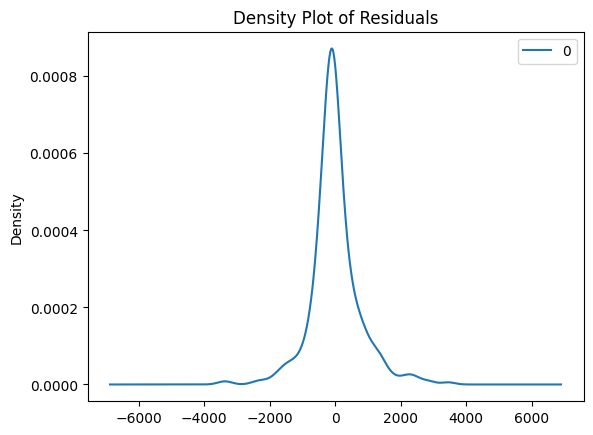

In [ ]:
# Plot the density of residuals
residuals.plot(kind='kde')
plt.title('Density Plot of Residuals')
plt.show()

In [ ]:
# Summary statistics of the residuals
print(residuals.describe())

                 0
count   737.000000
mean      0.032788
std     753.145914
min   -3459.790763
25%    -306.830336
50%     -64.226685
75%     255.993846
max    3451.909058


***Step 4: Walk-Forward Validation and Forecasting***

In [ ]:
# Step 4: Evaluate ARIMA model using walk-forward validation
from sklearn.metrics import mean_squared_error
from math import sqrt


In [ ]:
# Split the data into training and test sets (66% training, 34% test)
X = df_melted['Flow'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

In [ ]:
# Walk-forward validation
history = [x for x in train]
predictions = list()

In [ ]:
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'predicted={yhat}, expected={obs}')

predicted=461.68894963078105, expected=151
predicted=229.52413107239255, expected=127
predicted=353.1430927687586, expected=117
predicted=197.87402532995208, expected=360
predicted=409.38019660566965, expected=1385
predicted=1458.4884502790585, expected=1532
predicted=1429.7020749456353, expected=1733
predicted=1633.2896173603638, expected=1448
predicted=1195.6317609655673, expected=3446
predicted=3412.434308276413, expected=1199
predicted=829.1897824643065, expected=384
predicted=409.1721025672228, expected=248
predicted=254.43834553985377, expected=203
predicted=187.70837036434696, expected=173
predicted=749.1251307493601, expected=160
predicted=343.15563607984507, expected=201
predicted=239.96054308255486, expected=397
predicted=420.5332046653457, expected=867
predicted=885.7169566070806, expected=1256
predicted=1221.324328925342, expected=4648
predicted=4800.030474869206, expected=3952
predicted=3467.938228801193, expected=1570
predicted=1095.9399109721028, expected=359
predicted=2

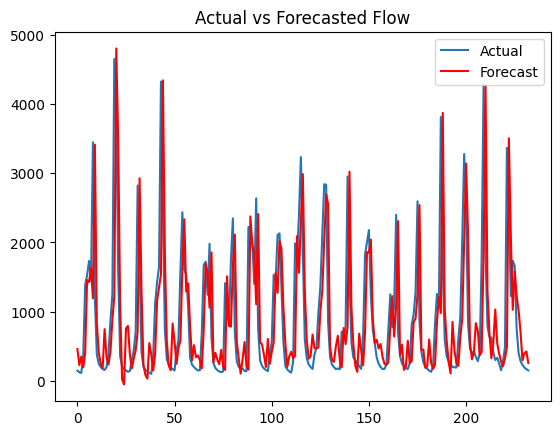

In [ ]:
# Plot forecasts against actual outcomes
plt.plot(test, label='Actual')
plt.plot(predictions, color='red', label='Forecast')
plt.title('Actual vs Forecasted Flow')
plt.legend()
plt.show()